Generated Caption: startseq a snowboarder is going down a mountain endseq


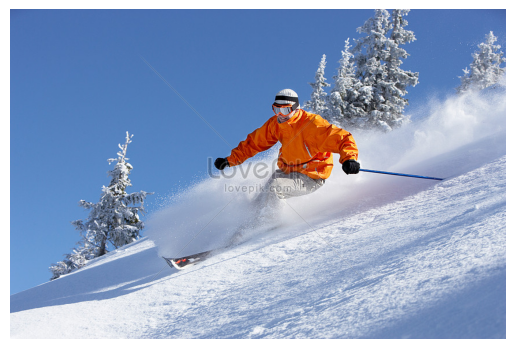

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from PIL import Image
import matplotlib.pyplot as plt
import pickle

# Load pre-trained VGG16 model (without the top layers) to extract image features
def extract_image_features(image_path):
    # Load VGG16 model without the classification layers
    vgg_model = VGG16(weights='imagenet')
    vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)  # Use the last layer before FC layers
    
    # Load and preprocess the image
    image = load_img(image_path, target_size=(224, 224))  # Resize to 224x224
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = preprocess_input(image)  # Preprocess the image (scale the pixel values)
    
    # Extract features using VGG16
    features = vgg_model.predict(image, verbose=0)
    return features

# Helper function to convert index to word
def idx_to_word(integer, tokenizer):
    return tokenizer.index_word.get(integer, None)  # Return None if not found

# Function to generate a caption for an image
def generate_caption(model, tokenizer, image_features, max_length):
    in_text = 'startseq'
    for i in range(max_length):
        # Convert input text to a sequence of word indices
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)  # Pad the sequence to max_length
        
        # Predict the next word in the sequence
        yhat = model.predict([image_features, sequence], verbose=0)
        yhat = np.argmax(yhat)  # Get index with highest probability
        
        # Convert predicted index to the corresponding word
        word = idx_to_word(yhat, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        
        # If the generated word is 'endseq', stop the prediction
        if word == 'endseq':
            break
    
    return in_text

# Load the tokenizer (assuming it's saved as a pickle file)
with open('tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Load the trained captioning model
model = load_model(r'D:\minor\vgg.keras')

# Maximum length of a caption (adjust to match the expected sequence length during training)
max_length = 37  # Set to 37 based on the model's expected input

# Test the model on a new image
image_path = r"D:\minor\sample1.jpg"  # Replace with the path to the test image
image_features = extract_image_features(image_path)

# Generate a caption for the image
caption = generate_caption(model, tokenizer, image_features, max_length)
print("Generated Caption:", caption)

# Display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


Generated Caption: startseq a dog is running down a dirt road endseq


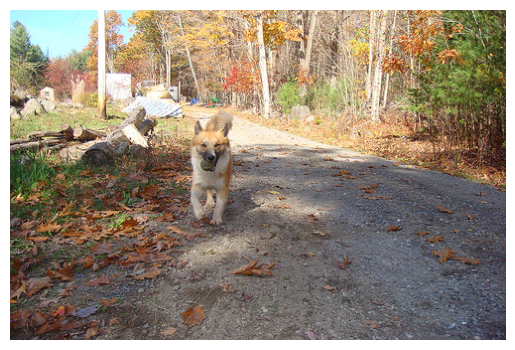

In [2]:
# Test the model on a new image
image_path = r"D:\minor\Images\1764955991_5e53a28c87.jpg" # Replace with the path to the test image
image_features = extract_image_features(image_path)

# Generate a caption for the image
caption = generate_caption(model, tokenizer, image_features, max_length)
print("Generated Caption:", caption)

# Display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


In [3]:
import pyttsx3
import time
import os

# Initialize the pyttsx3 engine
engine = pyttsx3.init()

# Define the text you want to convert to speech
text = caption

# Get the current speech rate
rate = engine.getProperty('rate')

# Set the new rate (slower speed)
engine.setProperty('rate', rate - 30)  # Decrease the rate by 20, adjust as needed

# Use the engine to say the text
engine.say(text)

# Wait for the speech to finish
engine.runAndWait()
